In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

# SEABORN

In [31]:
import seaborn as sns
sns.set_theme(context='talk')

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. In order to install seaborn, you can use the following command:

In [3]:
# !pip install seaborn
# or
# !conda install seaborn

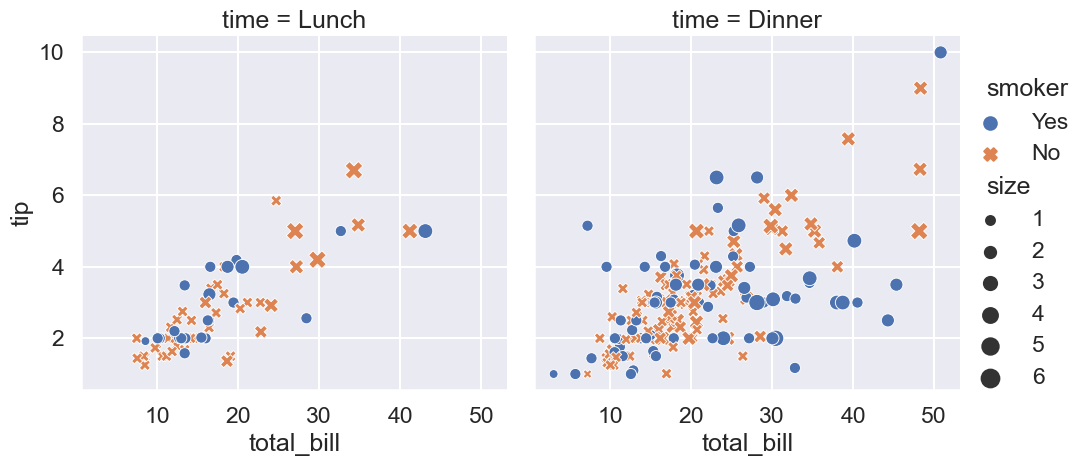

In [5]:
tips = sns.load_dataset("tips")
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

# Plotting functions in Seaborn

Seaborn provides you with a high level API, that lets you create visualizations with a single line of code. In contrary to Matplotlib, Seaborn allows you to focus on what the different elements of your plot mean, rather than on the details on how to draw them. Seaborn has its plots divided into several categories, such as: Relational, Categorical, Distribution. Each of these categories has its own set of plots, that can be used to visualize the data in different ways.

# Visualizing statistical relationships

Visualizing relations of variables is done using `relplot`, `scatterplot` or `lineplot` functions. `relplot` combines a FacetGrid with either scatterplot `(kind='scatter')` or lineplot `(kind='line')`, using `scatterplot` and `lineplot` in its implementation

In [6]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


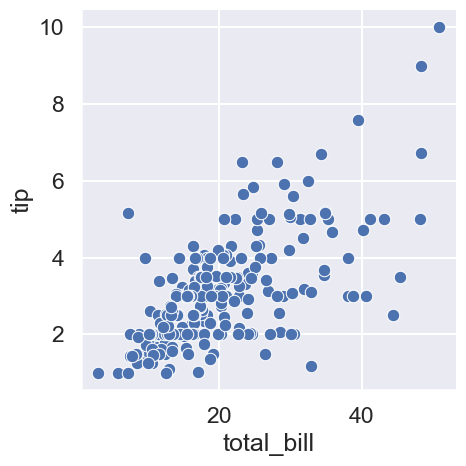

In [32]:
sns.relplot(data=tips, x="total_bill", y="tip", kind='scatter')
# sns.scatterplot() underneath

It's possible to add coloring, change style and adjust size based on other variables, by using `hue`, `style` and `size` keyword arguments

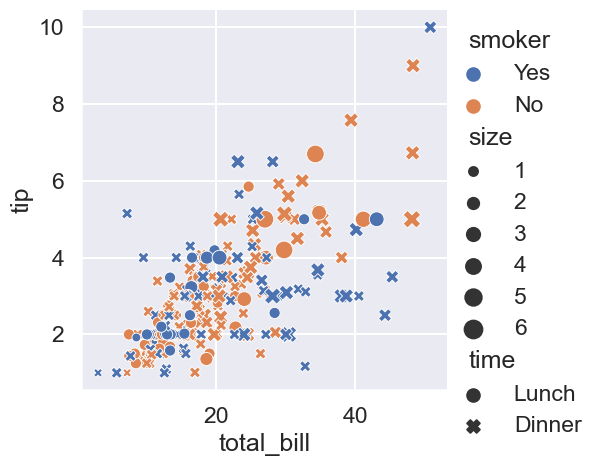

In [8]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="time", size='size')

"If we want to understand relationships of continuous variables, it's better to draw lineplots

In [10]:
dowjones = sns.load_dataset("dowjones")
dowjones.head()

,Date,Price
0,1914-12-01,55.00
1,1915-01-01,56.55
2,1915-02-01,56.00
3,1915-03-01,58.30
4,1915-04-01,66.45


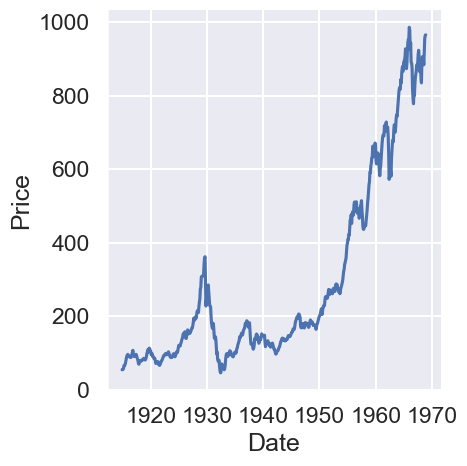

In [11]:
sns.relplot(data=dowjones, x="Date", y="Price", kind='line')
# sns.lineplot() underneath

# Visualizing distributions of data

`distributions` module contains functions designed to answer questions regarding the distribution of analyzed data. To visualize distributions of data we can use `histplot`, `kdeplot`, `ecdfplot`, `rugplot`, `displot`, `jointplot` and `pairplot` functions

The most common approach to visualize a distribution is a histogram, the default approach in `distplot` function, which uses underlying code of `histplot`

## Histogram

In [12]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


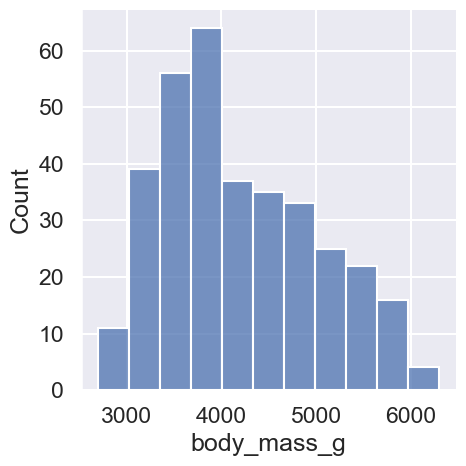

In [13]:
sns.displot(penguins, x="body_mass_g")

We can manually specify number of bins using `bins` or `binwidth` kwargs, and add coloring to distinguish elements by some other class, using `hue` keyword argument. To change the way different classes are plotted, we can adjust it using `multiple` keyword argument

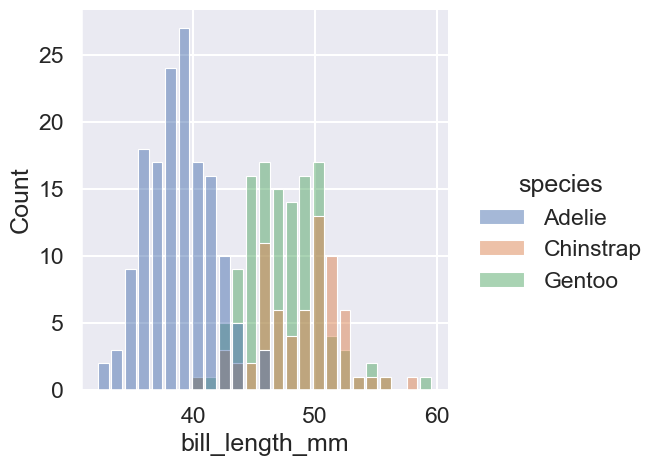

In [14]:
sns.displot(data=penguins, x="bill_length_mm", bins=25, shrink=0.8, hue='species')

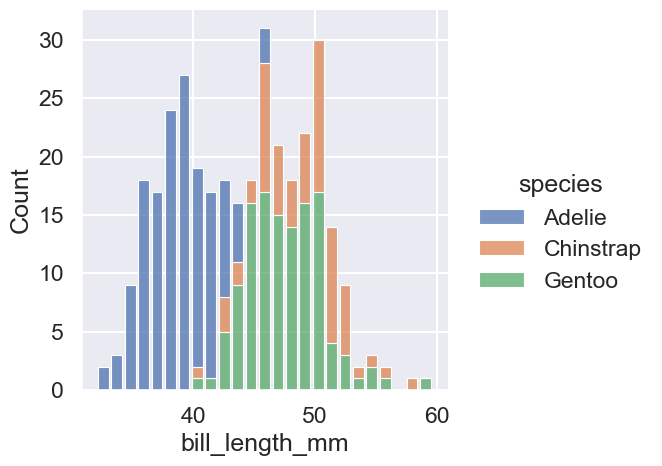

In [33]:
sns.displot(data=penguins, x="bill_length_mm", bins=25, shrink=0.8, hue='species', multiple='stack')

We can also plot different classes on different plots, specifying `col` argument to the class

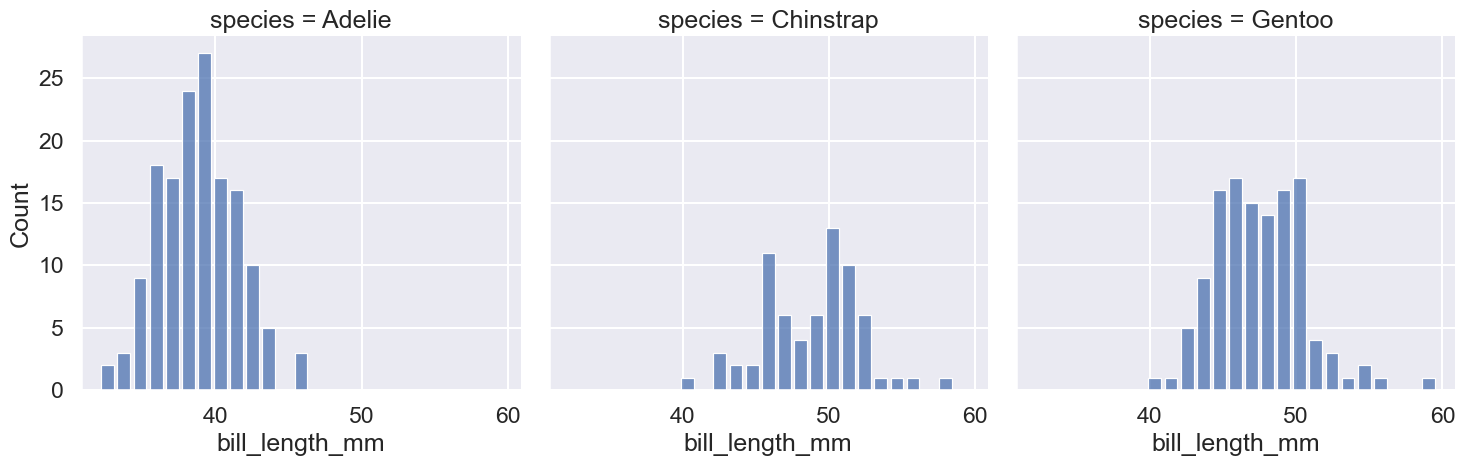

In [16]:
sns.displot(data=penguins, x="bill_length_mm", bins=25, shrink=0.8, col='species')

## Kernel density estimation

Kernel Density Estimation, or KDE, is a way to visualize the distribution of data by creating a smooth curve that represents the probability of finding data points at different values. Unlike a histogram, which shows data in fixed bins, KDE gives a continuous view of the data's spread, making it easier to see patterns, peaks, and clusters.

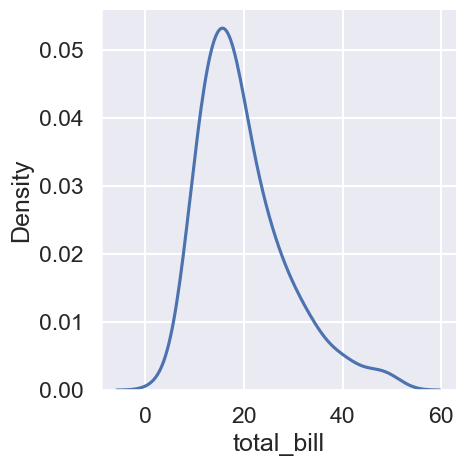

In [17]:
sns.displot(data=tips, x='total_bill', kind='kde')

## Empirical cumulative distribution

An Empirical Cumulative Distribution Function, or ECDF, is a way to visualize data that shows the proportion of observations falling below or at each value in a dataset

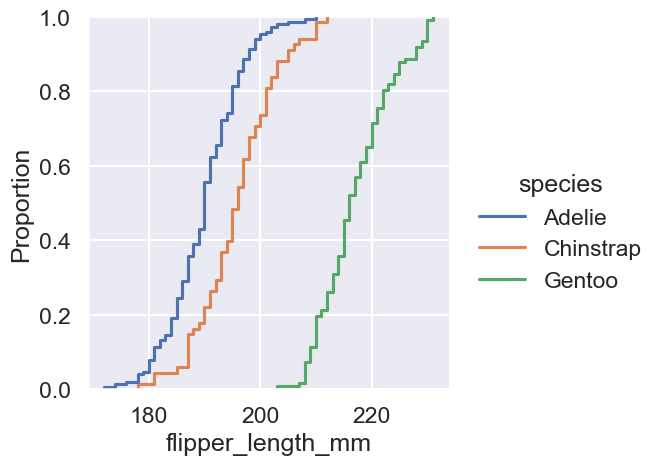

In [18]:
sns.displot(data=penguins, x='flipper_length_mm', kind='ecdf', hue='species')

## Joint Plot

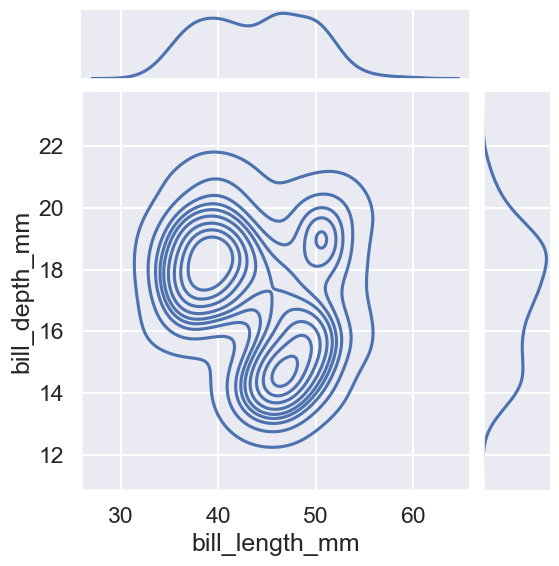

In [34]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", kind='kde')

# Plotting categorical data

There are several ways to plot relationships between data of categorical types. For this kind of plots we have `stripplot`, `swarmplot` (scatterplots), `boxplot`, `violinplot`, `boxenplot` (distribution), `pointplot`, `barplot`, `countplot` (estimate)

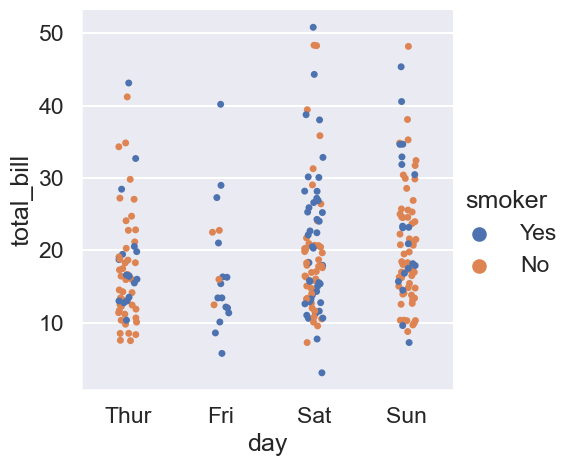

In [20]:
sns.catplot(data=tips, x="day", y="total_bill", hue='smoker')

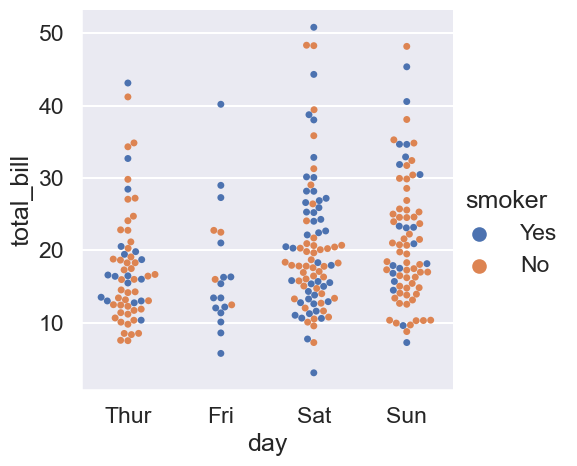

In [21]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm", hue='smoker')

## Comparing distributions

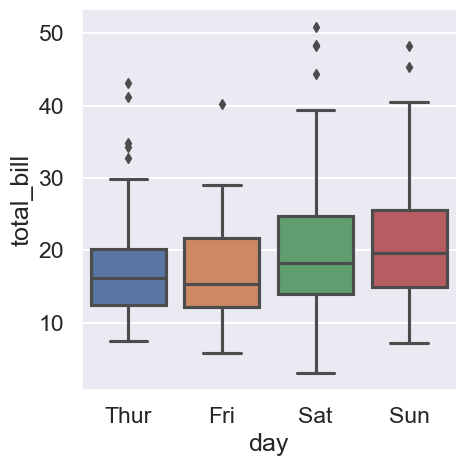

In [22]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

# SEABORN VS PURE MATPLOTLIB

In [23]:
x = np.random.rand(100)
y = np.random.rand(100)

Text(0, 0.5, 'Y Label')

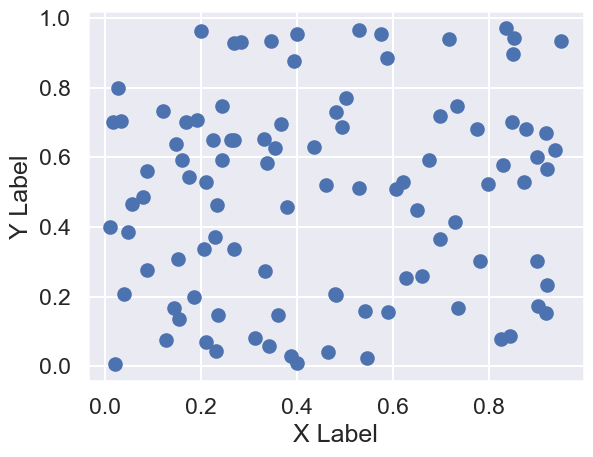

In [24]:
# MATPLOTLIB
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")

<Axes: xlabel='x', ylabel='y'>

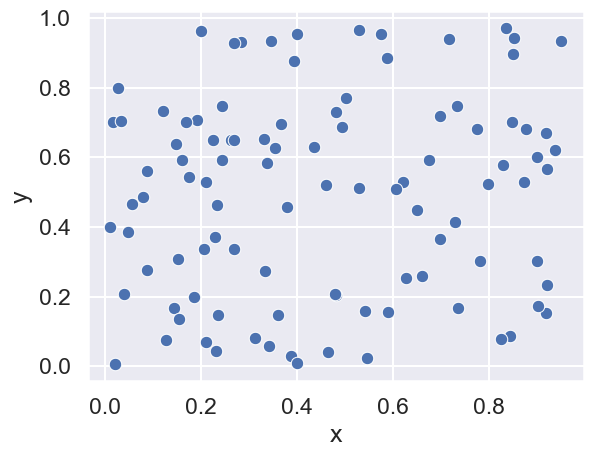

In [25]:
data = pd.DataFrame({'x': x, 'y': y})
sns.scatterplot(data=data, x='x', y='y')

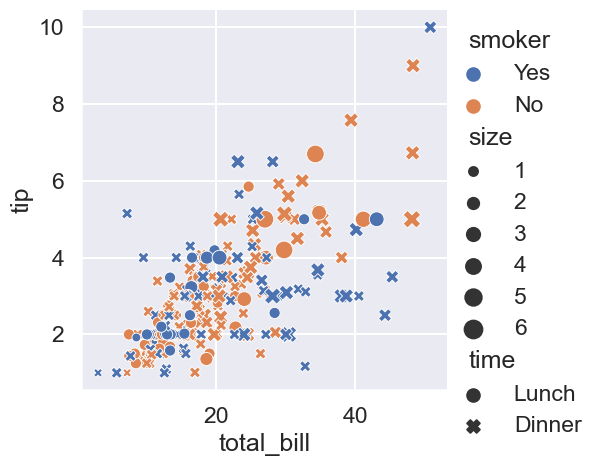

In [26]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="smoker", style="time", size='size')

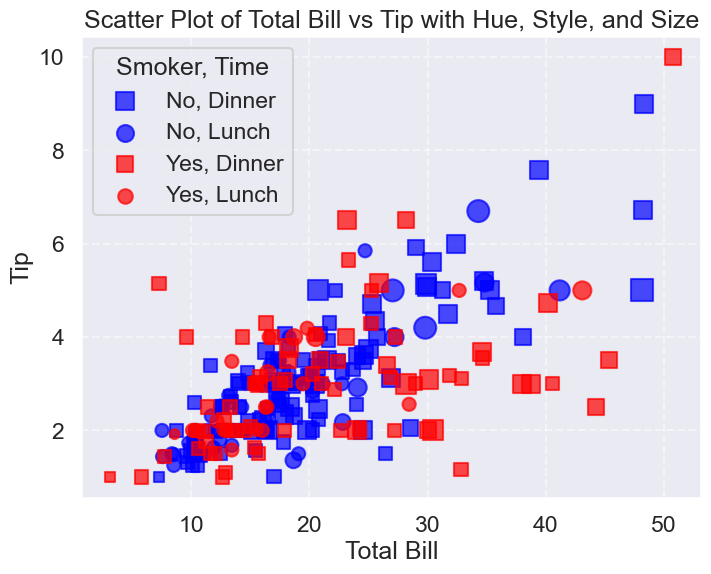

In [27]:
hue_values = tips['smoker'].unique()
style_values = tips['time'].unique()
colors = {'Yes': 'red', 'No': 'blue'}
markers = {'Lunch': 'o', 'Dinner': 's'}

size_values = tips['size']
size_min, size_max = size_values.min(), size_values.max()
normalized_sizes = 50 + (200 * (size_values - size_min) / (size_max - size_min))

fig, ax = plt.subplots(figsize=(8, 6))

for smoker in hue_values:
    for time in style_values:
        subset = tips[(tips['smoker'] == smoker) & (tips['time'] == time)]
        ax.scatter(
            subset['total_bill'],
            subset['tip'],
            color=colors[smoker],
            marker=markers[time],
            s=normalized_sizes[subset.index],
            label=f"{smoker}, {time}",
            alpha=0.7
        )

handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax.legend(unique_labels.values(), unique_labels.keys(), title="Smoker, Time")

ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
ax.set_title("Scatter Plot of Total Bill vs Tip with Hue, Style, and Size")
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()

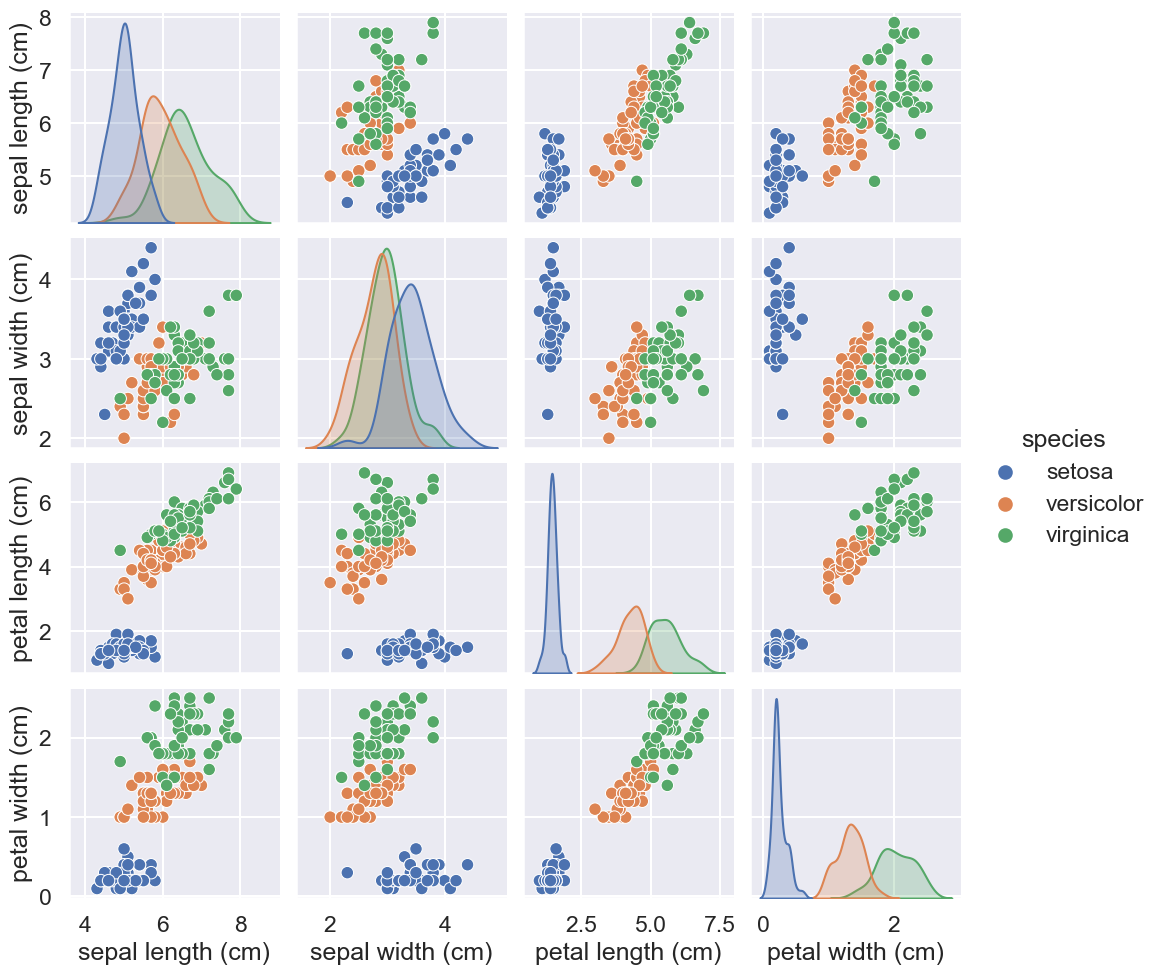

In [28]:
iris = load_iris(as_frame=True)
iris_data = iris['data']
iris_data['species'] = iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

sns.pairplot(iris_data, hue='species')

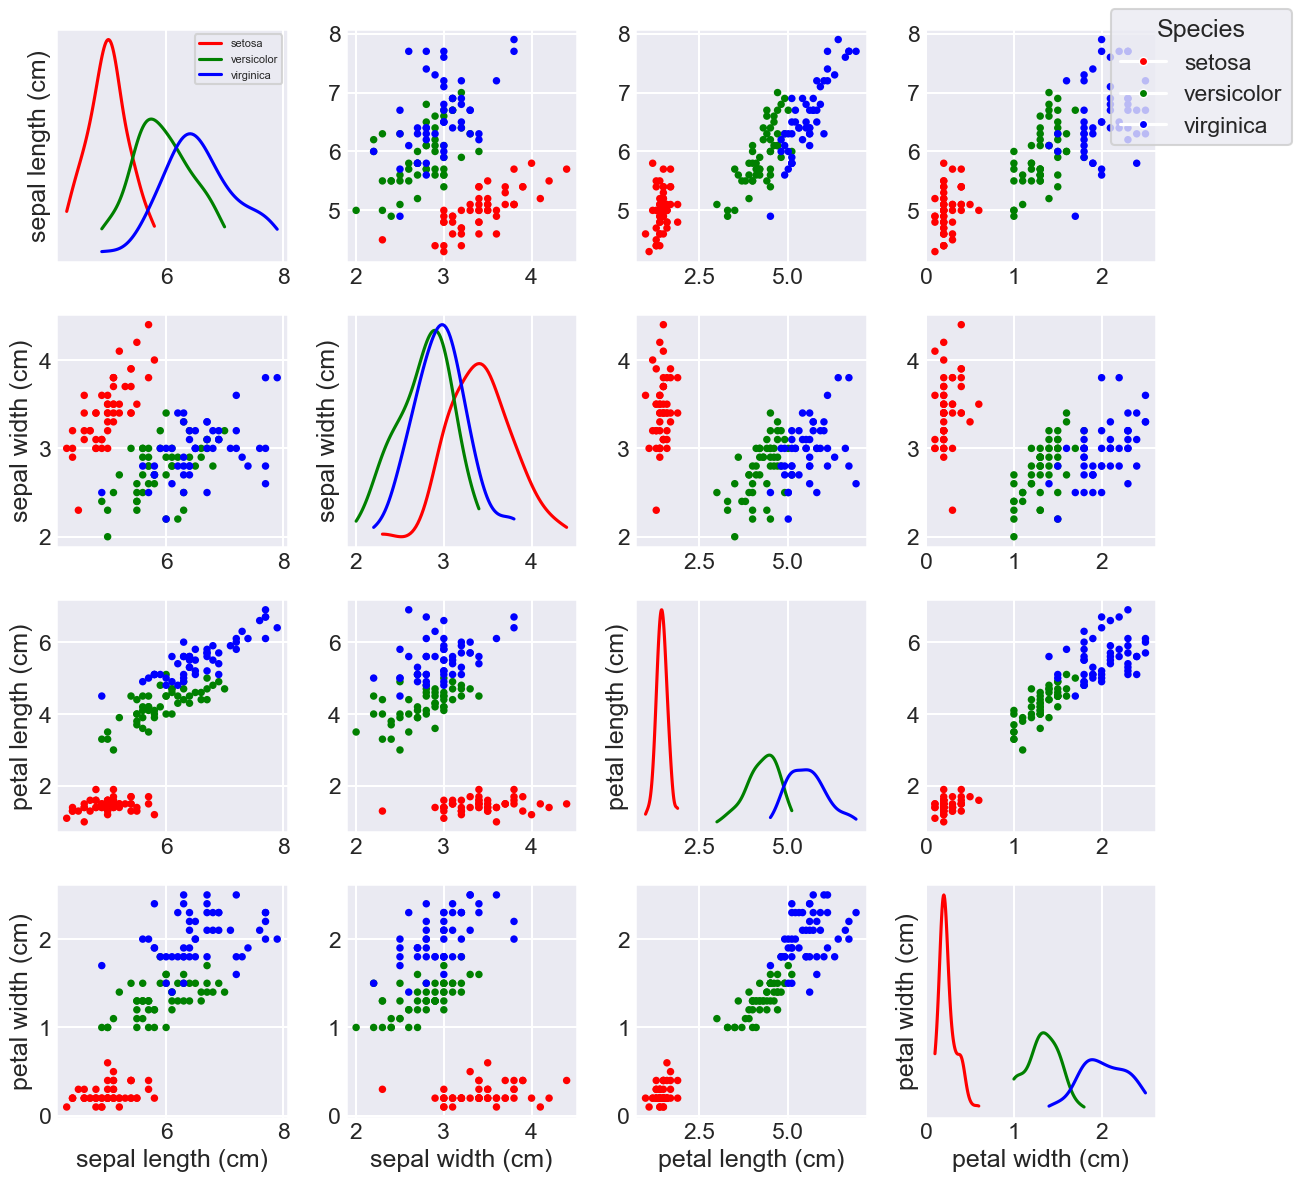

In [29]:
iris = load_iris(as_frame=True)
data = iris['data']
target = iris['target']
target_names = iris['target_names']

colors = np.array(['red', 'green', 'blue'])
target_colors = colors[target]

feature_names = data.columns
num_features = len(feature_names)

fig, axes = plt.subplots(num_features, num_features, figsize=(12, 12))

for i in range(num_features):
    for j in range(num_features):
        ax = axes[i, j]
        if i == j:
            feature_data = data.iloc[:, i]
            for class_value, class_name in enumerate(target_names):
                class_data = feature_data[target == class_value]
                kde = gaussian_kde(class_data)
                x_vals = np.linspace(class_data.min(), class_data.max(), 100)
                ax.plot(x_vals, kde(x_vals), label=class_name, color=colors[class_value])
            ax.set_ylabel(feature_names[i])
            ax.set_yticks([])
            if i == 0:
                ax.legend(loc='upper right', fontsize=8)
        else:
            ax.scatter(data.iloc[:, j], data.iloc[:, i], c=target_colors, s=15)

        if i == num_features - 1:
            ax.set_xlabel(feature_names[j])
        if j == 0:
            ax.set_ylabel(feature_names[i])
        ax.tick_params(axis='both', which='both', length=0)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=6)
           for color in colors]
fig.legend(handles, target_names, loc='upper right', title="Species", bbox_to_anchor=(1.1, 1))

plt.tight_layout()
plt.show()


Największe korzyści z Seaborn:
1. Prostota - Seaborn automatycznie zajmuje się wieloma szczegółami, jak zarządzanie ustawieniami osi, legendą itd.
2. Integracja - biblioteka ta jest kompatybilna z najważniejszymi narzędziami do analizy danych.

W porównaniu do Matplotlib, Seaborn oferuje wyższą abstrakcję, co sprawia, że tworzenie wykresów jest bardziej intuicyjne.
Seaborn to idealne narzędzie dla analityków danych, naukowców i programistów, którzy chcą szybko i efektywnie tworzyć wizualizacje, skupiając się na danych, a nie na detalach technicznych. Jeśli jednak potrzeby wizualizacyjne wykraczają poza możliwości Seaborn, można łatwo połączyć go z Matplotlib, dostosowując wykresy do swoich wymagań.

In [ ]:
sns.set_theme()